In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import copy
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

import torchvision
from torchvision import datasets, transforms

In [0]:
!unzip '/content/drive/My Drive/Colab Notebooks/dataset_Exp.zip'

Archive:  /content/drive/My Drive/Colab Notebooks/dataset_Exp.zip
  inflating: datasets/datasets.zip   


In [0]:
!unzip '/content/datasets/datasets.zip'

Streaming output truncated to the last 5000 lines.
  inflating: datasets/natural_images/cat/cat_0633.jpg  
  inflating: datasets/natural_images/cat/cat_0634.jpg  
  inflating: datasets/natural_images/cat/cat_0635.jpg  
  inflating: datasets/natural_images/cat/cat_0636.jpg  
  inflating: datasets/natural_images/cat/cat_0637.jpg  
  inflating: datasets/natural_images/cat/cat_0638.jpg  
  inflating: datasets/natural_images/cat/cat_0639.jpg  
  inflating: datasets/natural_images/cat/cat_0640.jpg  
  inflating: datasets/natural_images/cat/cat_0641.jpg  
  inflating: datasets/natural_images/cat/cat_0642.jpg  
  inflating: datasets/natural_images/cat/cat_0643.jpg  
  inflating: datasets/natural_images/cat/cat_0644.jpg  
  inflating: datasets/natural_images/cat/cat_0645.jpg  
  inflating: datasets/natural_images/cat/cat_0646.jpg  
  inflating: datasets/natural_images/cat/cat_0647.jpg  
  inflating: datasets/natural_images/cat/cat_0648.jpg  
  inflating: datasets/natural_images/cat/cat_0649.jpg

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:
mean = [0.485, 0.456, 0.405]
std  = [0.229, 0.224, 0.225]

In [0]:
train_transforms = transforms.Compose([
                                 #transforms.Resize(300),
                                 transforms.RandomResizedCrop(224),
                                 transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = mean, std = std)
])


test_transform = transforms.Compose([
                                 transforms.Resize(256),
                                 transforms.CenterCrop(224),
                                 #transforms.RandomHorizontalFlip(),
                                 transforms.ToTensor(),
                                 transforms.Normalize(mean = mean, std = std)
])

In [0]:
train_dir = '/content/datasets/chest_xray/train'
test_dir =  '/content/datasets/chest_xray/test'

In [0]:
train_data = datasets.ImageFolder(root = train_dir,
                                  transform = train_transforms)
                                 


test_data = datasets.ImageFolder(root = test_dir,
                                 transform = test_transform)

In [0]:
test_data

Dataset ImageFolder
    Number of datapoints: 624
    Root location: /content/datasets/chest_xray/test
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=PIL.Image.BILINEAR)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.405], std=[0.229, 0.224, 0.225])
           )

In [0]:
train_data

Dataset ImageFolder
    Number of datapoints: 5216
    Root location: /content/datasets/chest_xray/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.405], std=[0.229, 0.224, 0.225])
           )

In [0]:
test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size = 8,
                                          shuffle = True,
                                          num_workers = 4)

train_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size = 8,
                                          shuffle = True,
                                          num_workers = 4)

In [0]:
dataloader = {
    'train':train_loader,
    'test':test_loader
}

In [0]:
total_batch_size = {'train': len(train_loader), 'test': len(test_loader)}

total_batch_size

{'test': 78, 'train': 652}

In [0]:
class_names = train_data.classes

print(class_names)

['NORMAL', 'PNEUMONIA']


In [0]:
class_names = test_data.classes

print(class_names)

['NORMAL', 'PNEUMONIA']


In [0]:
def imshow(inp, title):

  inp = inp.cpu().numpy().transpose((1, 2, 0))
  inp = std * inp + mean
  inp = np.clip(inp, 0, 1)

  plt.figure(figsize = (12, 6))

  plt.imshow(inp)
  plt.title(title)
  plt.pause(5)

In [0]:
inputs, classes = next(iter(dataloader['train']))

In [0]:
out = torchvision.utils.make_grid(inputs)

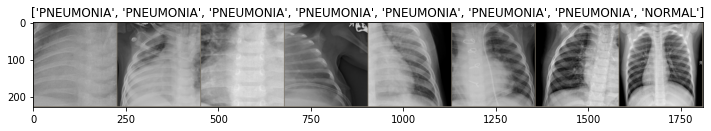

In [0]:
imshow(out, title = [class_names[x] for x in classes])

In [0]:
from torchvision import models

model = models.alexnet()

In [0]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
num_ftrs = model.classifier[6].in_features

num_ftrs

4096

In [0]:
model.classifier[6] = nn.Linear(num_ftrs, 2)

In [0]:
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [0]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.001)

#exp_lr_scheduler = lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

batch_size = 8

In [0]:
def train_model(model, criterion, optimizer, num_epochs=25):

    model = model.to(device)
    total_step = len(dataloader['train'])


    for epoch in range(num_epochs):
        print('epoch=',epoch)        

        for i, (images,labels)  in enumerate((dataloader['train'])):

                images = images.to(device)
                labels = labels.to(device)
    
                outputs = model(images)
                outputs = outputs.to(device)
                loss = criterion(outputs,labels)

                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

                if (i+1) % 100 == 0:
                    print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                           .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

        print('Epoch - %d, loss - %0.5f '\
            %(epoch, loss.item()))

    return model

In [0]:
model = train_model(model, criterion, optimizer,
                    num_epochs = 10)

epoch= 0
Epoch [1/10], Step [100/652], Loss: 0.6587
Epoch [1/10], Step [200/652], Loss: 0.6082
Epoch [1/10], Step [300/652], Loss: 0.5791
Epoch [1/10], Step [400/652], Loss: 0.5927
Epoch [1/10], Step [500/652], Loss: 0.6214
Epoch [1/10], Step [600/652], Loss: 0.5526
Epoch - 0, loss - 0.66424 
epoch= 1
Epoch [2/10], Step [100/652], Loss: 0.5178
Epoch [2/10], Step [200/652], Loss: 0.5871
Epoch [2/10], Step [300/652], Loss: 0.8670
Epoch [2/10], Step [400/652], Loss: 0.6816
Epoch [2/10], Step [500/652], Loss: 0.4418
Epoch [2/10], Step [600/652], Loss: 0.5891
Epoch - 1, loss - 0.51991 
epoch= 2
Epoch [3/10], Step [100/652], Loss: 0.7174
Epoch [3/10], Step [200/652], Loss: 0.5766
Epoch [3/10], Step [300/652], Loss: 0.5996
Epoch [3/10], Step [400/652], Loss: 0.5718
Epoch [3/10], Step [500/652], Loss: 0.5679
Epoch [3/10], Step [600/652], Loss: 0.3580
Epoch - 2, loss - 0.68436 
epoch= 3
Epoch [4/10], Step [100/652], Loss: 0.7982
Epoch [4/10], Step [200/652], Loss: 0.6807
Epoch [4/10], Step [300

In [0]:
model.eval()
with torch.no_grad():
    
    
    correct = 0
    total = 0
    
    for images, labels in test_loader:

        images = images.to(device)
        labels = labels.to(device) 

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    print('Accuracy of the model on the test images: {}%'\
          .format(100 * correct / total))

Accuracy of the model on the test images: 62.5%


Actual Label: 1


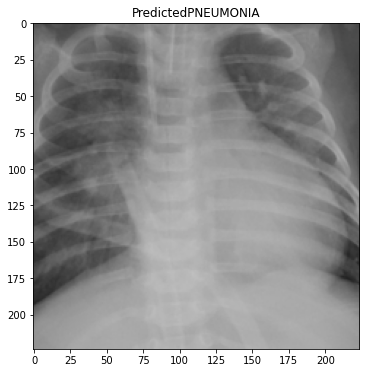

Actual Label: 1


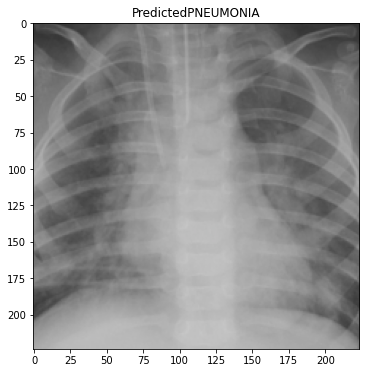

Actual Label: 1


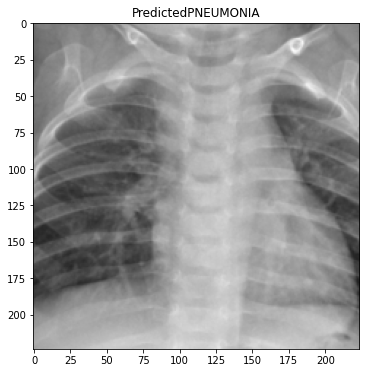

Actual Label: 1


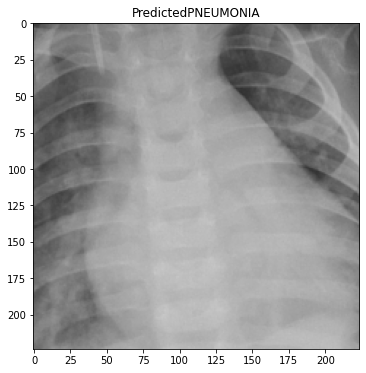

Actual Label: 1


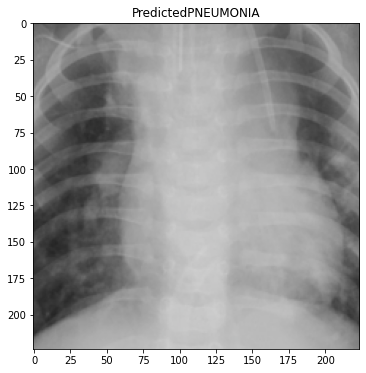

Actual Label: 1


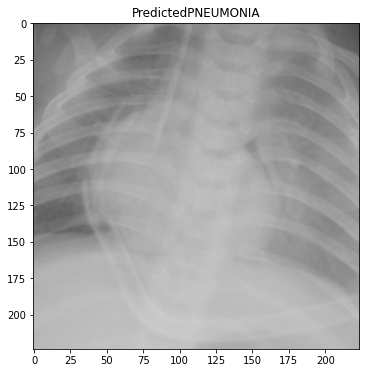

Actual Label: 1


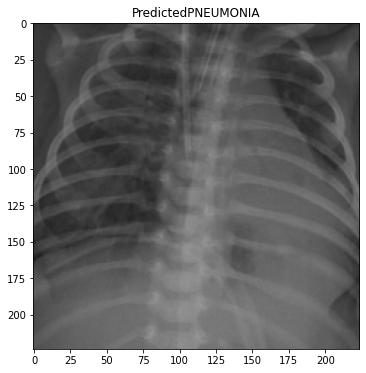

Actual Label: 0


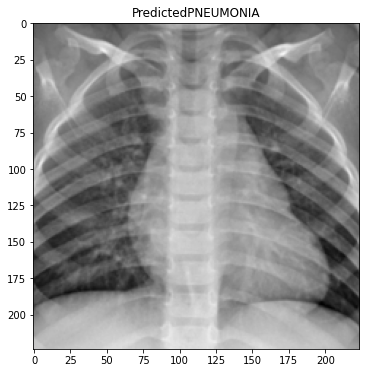

In [0]:
with torch.no_grad():

  inputs, labels = iter(dataloader['test']).next()
  inputs = inputs.to(device)

  inp = torchvision.utils.make_grid(inputs)

  outputs = model(inputs)
  _, preds = torch.max(outputs, 1)

  for j in range(len(inputs)):

    print("Actual Label:", np.array(labels)[j])
    inp = inputs.data[j]
    imshow(inp, "Predicted" + class_names[preds[j]])